In [1]:
!pip install pyyaml h5py

In [2]:
# Import necessary modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import imutils
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import imutils
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the images directories
import os
from imutils import paths
path = "/content/drive/MyDrive/brain_tumor_dataset"
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))
print(image_paths)

['.DS_Store', 'yes', 'no']
253
['/content/drive/MyDrive/brain_tumor_dataset/yes/Y74.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y104.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y19.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y257.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y31.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y246.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y18.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y12.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y17.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y67.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y188.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y92.jpg', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y192.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y47.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y182.JPG', '/content/drive/MyDrive/brain_tumor_dataset/yes/Y251.JPG', '/content/drive/MyDrive/brain_tum

In [6]:
import cv2
from skimage import io, color
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]

    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)
    
print(labels)
print(images)

['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'

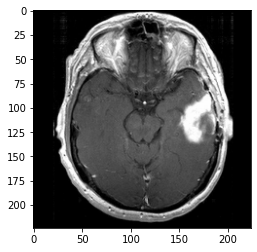

In [7]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [8]:
labels

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',


In [9]:
import numpy as np
images = np.array(images) / 255.0
labels = np.array(labels)

In [10]:
label_i=[]
print(len(labels))
for i in labels:
    if(i=='no'):
        label_i.append(0)
    elif(i=='yes'):
        label_i.append(1)

253


In [11]:
label_i=np.array(label_i)

In [12]:
#Split the dataset
(train_X, test_X, train_Y, test_Y) = train_test_split(images, label_i, test_size= 0.10, random_state= 42, stratify= labels)

In [13]:
train_Y.shape

(227,)

In [14]:
test_X.shape

(26, 224, 224, 3)

In [15]:
test_Y.shape

(26,)

# ANN

In [16]:
from keras.models import Sequential

In [17]:
train_X[1].shape

(224, 224, 3)

In [18]:
import keras

In [19]:
model = Sequential()
model.add(keras.Input(shape=(224, 224, 3)))
model.add(Dense(3, activation='relu', input_dim = 3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224, 224, 3)       12        
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               19267712  
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19,267,853
Trainable params: 19,267,853
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(train_X, train_Y.reshape((-1,1)), epochs = 10)

Epoch 1/10
8/8 [==============================] - 4s 329ms/step - loss: 9.0316 - accuracy: 0.5286
Epoch 2/10
8/8 [==============================] - 2s 267ms/step - loss: 4.5219 - accuracy: 0.6432
Epoch 3/10
8/8 [==============================] - 2s 269ms/step - loss: 2.6833 - accuracy: 0.7621
Epoch 4/10
8/8 [==============================] - 3s 369ms/step - loss: 1.0652 - accuracy: 0.7709
Epoch 5/10
8/8 [==============================] - 2s 253ms/step - loss: 0.4944 - accuracy: 0.8634
Epoch 6/10
8/8 [==============================] - 2s 247ms/step - loss: 0.4052 - accuracy: 0.8722
Epoch 7/10
8/8 [==============================] - 2s 251ms/step - loss: 0.3037 - accuracy: 0.8987
Epoch 8/10
8/8 [==============================] - 2s 249ms/step - loss: 0.2018 - accuracy: 0.9295
Epoch 9/10
8/8 [==============================] - 2s 240ms/step - loss: 0.1073 - accuracy: 0.9604
Epoch 10/10
8/8 [==============================] - 2s 245ms/step - loss: 0.1571 - accuracy: 0.9251


In [23]:
model.evaluate(test_X,test_Y)

1/1 [==============================] - 0s 264ms/step - loss: 0.4738 - accuracy: 0.9231


[0.4738427698612213, 0.9230769276618958]

# CNN

In [24]:
cnn = models.Sequential([

layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224,3)),
layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.25),

layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),

layers.Dropout (0.2),

layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.25),

layers.Flatten(),

layers.Dense(64, activation='relu'),

layers.Dropout(0.2),

layers.Dense(2, activation='softmax'),
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [27]:
cnn.fit(train_X, train_Y, epochs=10)

Epoch 1/10
8/8 [==============================] - 63s 7s/step - loss: 1.2844 - accuracy: 0.5154
Epoch 2/10
8/8 [==============================] - 60s 7s/step - loss: 0.6381 - accuracy: 0.6123
Epoch 3/10
8/8 [==============================] - 60s 7s/step - loss: 0.6265 - accuracy: 0.7137
Epoch 4/10
8/8 [==============================] - 60s 7s/step - loss: 0.5831 - accuracy: 0.6828
Epoch 5/10
8/8 [==============================] - 61s 7s/step - loss: 0.5231 - accuracy: 0.7709
Epoch 6/10
8/8 [==============================] - 60s 7s/step - loss: 0.4916 - accuracy: 0.7885
Epoch 7/10
8/8 [==============================] - 60s 7s/step - loss: 0.5140 - accuracy: 0.7841
Epoch 8/10
8/8 [==============================] - 60s 7s/step - loss: 0.5350 - accuracy: 0.8018
Epoch 9/10
8/8 [==============================] - 61s 7s/step - loss: 0.4606 - accuracy: 0.7885
Epoch 10/10
8/8 [==============================] - 61s 7s/step - loss: 0.4651 - accuracy: 0.8150


In [28]:
cnn.evaluate(test_X,test_Y)

1/1 [==============================] - 2s 2s/step - loss: 0.4617 - accuracy: 0.8846


[0.4616697132587433, 0.8846153616905212]

In [29]:
cnn.save('normal_abnormal.h5')

In [30]:
y_pred = cnn.predict(test_X)
y_true = test_Y

In [31]:
y_pred = [np.argmax(element) for element in y_pred]

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 8,  2],
       [ 1, 15]])

In [33]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
acc

0.8846153846153846

In [34]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred)
precision

0.8823529411764706

In [35]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.9375

In [36]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.9090909090909091

In [39]:
hamming_loss = metrics.hamming_loss(y_true, y_pred)
hamming_loss 

0.11538461538461539

In [40]:
jaccard = metrics.jaccard_score(y_true, y_pred)
jaccard 

0.8333333333333334

In [41]:
cross_entropy_loss = metrics.log_loss(y_true, y_pred)
cross_entropy_loss 

3.9853049376766325

# CNN with Augmentation layer

In [47]:
from tensorflow import keras
data_augmentation = models.Sequential(
  [
    layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="wrap"),
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [48]:
cnn_with_aug = models.Sequential([

data_augmentation,
layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224,3)),
layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.25),

layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),

layers.Dropout (0.2),

layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.25),

layers.Flatten(),

layers.Dense(64, activation='relu'),

layers.Dropout(0.2),

layers.Dense(2, activation='softmax'),
])

In [49]:
cnn_with_aug.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
cnn_with_aug.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                      

In [51]:
cnn_with_aug.fit(train_X, train_Y, epochs=20)

Epoch 1/20
8/8 [==============================] - 65s 8s/step - loss: 2.0674 - accuracy: 0.4758
Epoch 2/20
8/8 [==============================] - 63s 8s/step - loss: 0.6524 - accuracy: 0.6123
Epoch 3/20
8/8 [==============================] - 63s 8s/step - loss: 0.6716 - accuracy: 0.6123
Epoch 4/20
8/8 [==============================] - 63s 8s/step - loss: 0.6670 - accuracy: 0.6123
Epoch 5/20
8/8 [==============================] - 63s 8s/step - loss: 0.6519 - accuracy: 0.6123
Epoch 6/20
8/8 [==============================] - 63s 8s/step - loss: 0.6645 - accuracy: 0.6211
Epoch 7/20
8/8 [==============================] - 62s 8s/step - loss: 0.6850 - accuracy: 0.6123
Epoch 8/20
8/8 [==============================] - 62s 8s/step - loss: 0.6739 - accuracy: 0.6123
Epoch 9/20
8/8 [==============================] - 62s 8s/step - loss: 0.6472 - accuracy: 0.6123
Epoch 10/20
8/8 [==============================] - 62s 8s/step - loss: 0.6440 - accuracy: 0.6123
Epoch 11/20
8/8 [======================

In [52]:
cnn_with_aug.evaluate(test_X,test_Y)

1/1 [==============================] - 2s 2s/step - loss: 0.6055 - accuracy: 0.8077


[0.6055073142051697, 0.807692289352417]

# VGG16

In [54]:
VGG16 = models.Sequential([

layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
layers.Flatten(),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=2, activation="softmax"),
])

In [55]:
VGG16.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [56]:
VGG16.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

# AlexNet

In [65]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization




# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [66]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_31 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 activation_10 (Activation)  (None, 17, 17, 256)      